Project

In [ ]:
#Processing data
import pandas as pd
df = pd.read_csv(r'C:\Users\Kshitij\OneDrive\Desktop\Projects\Minor & Major Project\Dataset.csv')

water_data_info = df.info()
water_data_head = df.head()

water_data_info, water_data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


(None,
          ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
 0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
 1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
 2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
 3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
 4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   
 
    Organic_carbon  Trihalomethanes  Turbidity  Potability  
 0       10.379783        86.990970   2.963135           0  
 1       15.180013        56.329076   4.500656           0  
 2       16.868637        66.420093   3.055934           0  
 3       18.436524       100.341674   4.628771           0  
 4       11.558279        31.997993   4.075075           0  )

In [2]:
df['Sulfate'].fillna(df['Sulfate'].mean(), inplace=True)
df['ph'].fillna(df['ph'].mean(), inplace=True)
df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean(), inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_15624\3628369605.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sulfate'].fillna(df['Sulfate'].mean(), inplace=True)
C:\Users\Hp\AppData\Local\Temp\ipykernel_15624\3628369605.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [4]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
df_clean = df.copy() 
Q1 = df_clean.quantile(0.25)
Q3 = df_clean.quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Filter out rows that contain outliers
df_clean = df_clean[~((df_clean < (Q1 - 1.5 * IQR)) | (df_clean > (Q3 + 1.5 * IQR))).any(axis=1)]

In [5]:
print(df_clean)


            ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.080795  204.890455  20791.318981     7.300212  368.516441   
2     8.099124  224.236259  19909.541732     9.275884  333.775777   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
5     5.584087  188.313324  28748.687739     7.544869  326.678363   
...        ...         ...           ...          ...         ...   
3270  6.069616  186.659040  26138.780191     7.747547  345.700257   
3272  7.808856  193.553212  17329.802160     8.061362  333.775777   
3273  9.419510  175.762646  33155.578218     7.350233  333.775777   
3274  5.126763  230.603758  11983.869376     6.303357  333.775777   
3275  7.874671  195.102299  17404.177061     7.509306  333.775777   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
2       418.60621

In [6]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [7]:
df_clean.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [8]:
#SVM with GridSearch
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Step 1: Split data into features (X) and target (y)
X = df_clean.drop('Potability', axis=1)  # Features (drop the Potability column)
y = df_clean['Potability']               # Target (Potability column)

# Step 2: Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Normalize the features (scaling is important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Create and train the SVM model
svm_model = SVC(kernel='linear')  # You can change kernel type (e.g., 'rbf' or 'poly')
svm_model.fit(X_train_scaled, y_train)

# Step 5: Make predictions and evaluate the model
y_pred = svm_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of SVM Model: {accuracy:.2f}")

Accuracy of SVM Model: 0.64


In [9]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Step 1: Split data into features (X) and target (y)
X = df_clean.drop('Potability', axis=1)  # Features (drop the Potability column)
y = df_clean['Potability']               # Target (Potability column)

# Step 2: Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Normalize the features (scaling is important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Use GridSearchCV to find the best hyperparameters for SVM with 'rbf' kernel
# Define a parameter grid to search for best hyperparameters
param_grid = {
    'C': [0.1, 1, 10, 100],        # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001],  # Kernel coefficient for 'rbf'
    'kernel': ['rbf']               # We'll use only the 'rbf' kernel here
}

# Create a SVM model
svm = SVC(class_weight='balanced')

# Use GridSearchCV for hyperparameter tuning
grid = GridSearchCV(svm, param_grid, refit=True, verbose=2, cv=5)  # 5-fold cross-validation
grid.fit(X_train_scaled, y_train)

# Step 5: Best parameters and performance
print("Best Parameters found by GridSearchCV:", grid.best_params_)

# Predict with the best model
y_pred = grid.predict(X_test_scaled)

# Step 6: Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of SVM Model after hyperparameter tuning: {accuracy:.2f}")


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01

In [10]:
#XGBoost
from xgboost import XGBClassifier

# Instantiate and train the model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred_xgb = xgb_model.predict(X_test_scaled)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy with XGBoost: {accuracy_xgb:.2f}")

Accuracy with XGBoost: 0.64


In [11]:
#Ensemble method xgb, logistic regression and random forest
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Create base models
rf = RandomForestClassifier(random_state=42)
lr = LogisticRegression(random_state=42)
xgb = XGBClassifier(random_state=42)

# Create a Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('rf', rf),
    ('lr', lr),
    ('xgb', xgb)
], voting='hard')  # Use 'soft' for predicted probabilities

# Fit the Voting Classifier directly
voting_clf.fit(X_train_scaled, y_train)

# Evaluate the Voting Classifier
y_pred_voting = voting_clf.predict(X_test_scaled)
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print(f"Accuracy of the Voting Classifier: {accuracy_voting:.2f}")

# Define a parameter grid for the Voting Classifier
param_grid = {
    'rf__n_estimators': [100, 200],  # Random Forest parameters
    'lr__C': [0.01, 0.1, 1, 10],     # Logistic Regression parameters
    'xgb__n_estimators': [100, 200]  # XGBoost parameters
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=voting_clf, param_grid=param_grid, cv=3)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Evaluate the tuned Voting Classifier
best_voting_clf = grid_search.best_estimator_
y_pred_best_voting = best_voting_clf.predict(X_test_scaled)
accuracy_best_voting = accuracy_score(y_test, y_pred_best_voting)
print(f"Improved accuracy with GridSearchCV: {accuracy_best_voting:.2f}")

Accuracy of the Voting Classifier: 0.67
Best parameters: {'lr__C': 0.01, 'rf__n_estimators': 200, 'xgb__n_estimators': 200}
Improved accuracy with GridSearchCV: 0.66


In [12]:
#Deep Learning Neural Network with batch normalization and early stopping
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = df_clean

# Display the first few rows of the dataset
print(df.head())

# Separate features and target variable
X = df.drop('Potability', axis=1)
y = df['Potability']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.080795  204.890455  20791.318981     7.300212  368.516441    564.308654   
2  8.099124  224.236259  19909.541732     9.275884  333.775777    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   
5  5.584087  188.313324  28748.687739     7.544869  326.678363    280.467916   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  
5        8.399735        54.917862   2.559708           0  


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# Create the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dropout(0.5))  # Dropout layer
model.add(BatchNormalization())  # Batch normalization

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer

model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=20, restore_best_weights=True)

C:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# Train the model with early stopping
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4322 - loss: 0.9241 - val_accuracy: 0.6276 - val_loss: 0.6743
Epoch 2/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5156 - loss: 0.7418 - val_accuracy: 0.6323 - val_loss: 0.6668
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5566 - loss: 0.7026 - val_accuracy: 0.6323 - val_loss: 0.6651
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5878 - loss: 0.6942 - val_accuracy: 0.6323 - val_loss: 0.6631
Epoch 5/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5877 - loss: 0.6778 - val_accuracy: 0.6323 - val_loss: 0.6629
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6019 - loss: 0.6676 - val_accuracy: 0.6323 - val_loss: 0.6617
Epoch 7/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6166 - loss: 0.6696 - val_accuracy: 0.6323 - val_loss: 0.6610
Epoch 8/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6097 - loss: 0.6684 - val_accuracy: 0.6323 - v

In [15]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6532 - loss: 0.6041 
Test Accuracy: 0.66


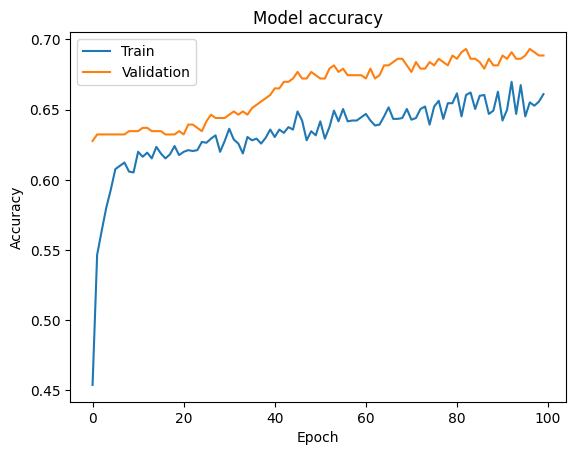

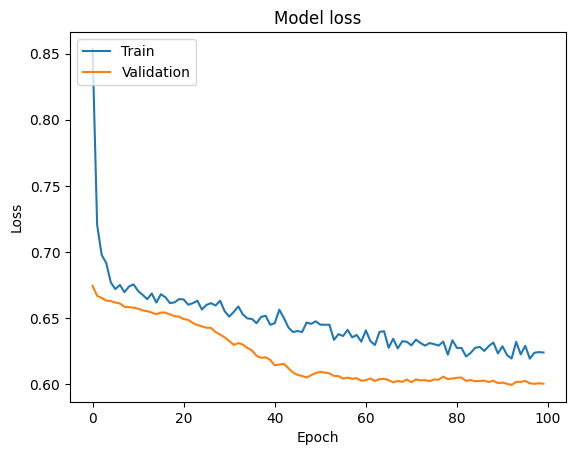

In [16]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [17]:
#Decision Trees
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load your dataset (update the path as necessary)
df = df_clean

# Assuming 'Potability' is the target variable
X = df.drop('Potability', axis=1)
y = df['Potability']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy of Decision Tree model: {accuracy_dt:.2f}")

# Print classification report for more insights
print(classification_report(y_test, y_pred_dt))

Accuracy of Decision Tree model: 0.58
              precision    recall  f1-score   support

           0       0.67      0.68      0.68       342
           1       0.42      0.41      0.41       192

    accuracy                           0.58       534
   macro avg       0.55      0.54      0.55       534
weighted avg       0.58      0.58      0.58       534



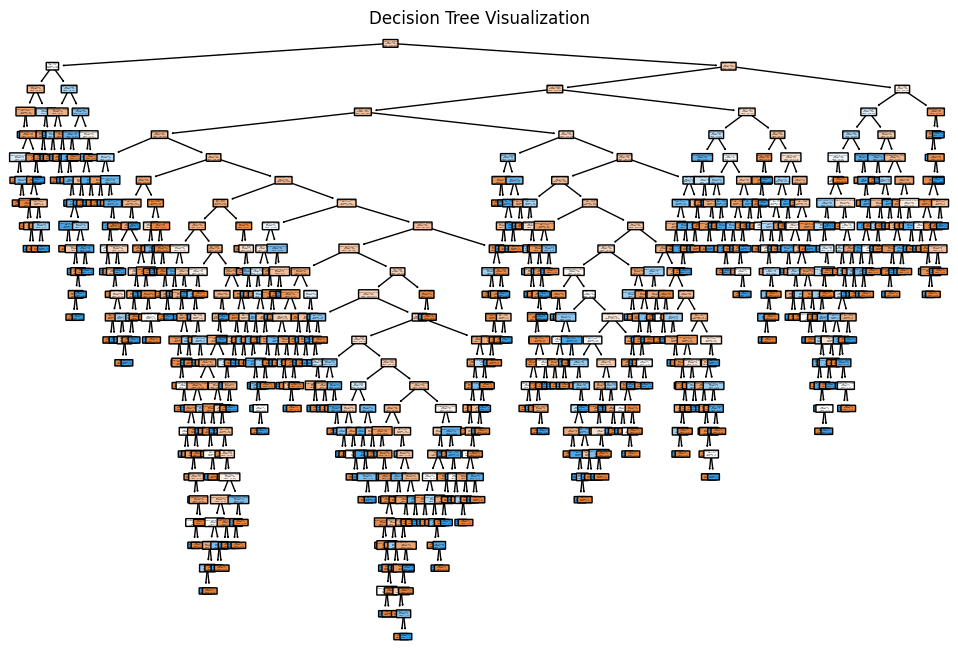

In [18]:
# Optional: Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=['Not Potable', 'Potable'], rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

In [19]:
#Multi layer perceptron
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
df = df_clean

# Assuming 'Potability' is the target variable
X = df.drop('Potability', axis=1)
y = df['Potability']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the MLP model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dropout(0.5))  # Dropout layer to prevent overfitting
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, 
                    validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
y_pred_mlp = model.predict(X_test_scaled)
y_pred_mlp_classes = (y_pred_mlp > 0.5).astype(int)  # Convert probabilities to class labels

# Calculate accuracy
accuracy_mlp = accuracy_score(y_test, y_pred_mlp_classes)
print(f"Accuracy of MLP model: {accuracy_mlp:.2f}")

# Print classification report
print(classification_report(y_test, y_pred_mlp_classes))


Epoch 1/100


C:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6015 - loss: 0.6828 - val_accuracy: 0.6323 - val_loss: 0.6600
Epoch 2/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6264 - loss: 0.6616 - val_accuracy: 0.6347 - val_loss: 0.6560
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6060 - loss: 0.6627 - val_accuracy: 0.6393 - val_loss: 0.6465
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6331 - loss: 0.6458 - val_accuracy: 0.6909 - val_loss: 0.6489
Epoch 5/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6414 - loss: 0.6438 - val_accuracy: 0.6534 - val_loss: 0.6346
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6525 - loss: 0.6293 - val_accuracy: 0.6909 - val_loss: 0.6396
Epoch 7/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6239 - loss: 0.6495 - val_accuracy: 0.6815 - val_loss: 0.6249
Epoch 8/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6252 - loss: 0.6374 - val_accuracy: 0.6815 - val_loss: 0.6

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier as xgboost
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import classification_report
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from sklearn.naive_bayes import GaussianNB
from sklearn.utils import resample

In [21]:
X = df.drop('Potability', axis=1)
y = df['Potability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

df_majority = df[df.Potability==0]
df_minority = df[df.Potability==1]

df_minority_upsampled = resample(df_minority,
                                 replace=True,
                                 n_samples=len(df_majority),
                                 random_state=8)

df_upsampled = pd.concat([df_majority, df_minority_upsampled])

X_upsampled = df_upsampled.drop('Potability', axis=1)
y_upsampled = df_upsampled['Potability']

X_train_up, X_test_up, y_train_up, y_test_up = train_test_split(X_upsampled, y_upsampled, test_size=0.2, random_state=17)

xgb_model = xgboost()

# bayes search
opt = BayesSearchCV(
    xgb_model,
    {
        'n_estimators': Integer(100, 1000),
        'max_depth': Integer(3, 10),
        'learning_rate': Real(0.01, 1.0, 'log-uniform'),
        'subsample': Real(0.5, 1.0, 'uniform'),
        'min_child_weight': Integer(1, 10),
        'colsample_bytree': Real(0.1, 1.0, 'uniform'),
        'gamma': Real(0.1, 5.0, 'uniform'),
    },
    n_iter=32,
    verbose = 3,
    n_jobs = -1,
    cv=5
)
BayesSearchCV.fit(opt, X_train_up, y_train_up)
# classification report
y_pred = opt.predict(X_test_up)
print(classification_report(y_test_up, y_pred))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [22]:
opt.best_params_

OrderedDict([('colsample_bytree', 1.0),
             ('gamma', 0.1),
             ('learning_rate', 0.01),
             ('max_depth', 10),
             ('min_child_weight', 1),
             ('n_estimators', 962),
             ('subsample', 0.5)])

In [26]:
# Blockchain Setup
import hashlib
import json
from time import time

class Blockchain:
    def __init__(self):
        self.chain = []
        self.create_block(previous_hash='0')  # Genesis block

    def create_block(self, data=None, previous_hash='0'):
        block = {
            'index': len(self.chain) + 1,
            'timestamp': time(),
            'data': data,
            'previous_hash': previous_hash,
            'hash': self.hash_block(data, previous_hash)
        }
        self.chain.append(block)
        return block

    @staticmethod
    def hash_block(data, previous_hash):
        block_string = json.dumps({'data': data, 'previous_hash': previous_hash}, sort_keys=True).encode()
        return hashlib.sha256(block_string).hexdigest()

    def add_block(self, data):
        previous_hash = self.chain[-1]['hash'] if self.chain else '0'
        return self.create_block(data, previous_hash)

    def is_chain_valid(self):
        for i in range(1, len(self.chain)):
            block = self.chain[i]
            prev_block = self.chain[i - 1]
            if block['previous_hash'] != prev_block['hash']:
                return False
            if block['hash'] != self.hash_block(block['data'], block['previous_hash']):
                return False
        return True

# Initialize blockchain
blockchain = Blockchain()

# Track the initial training data
training_data_hash = hashlib.sha256(X_train_up.to_string().encode()).hexdigest()
blockchain.add_block(data={'action': 'Training Data Integrity', 'data_hash': training_data_hash})

# Model Training with Bayesian Optimization
from sklearn.ensemble import RandomForestClassifier
from skopt import BayesSearchCV
from skopt.space import Integer, Categorical
from sklearn.metrics import accuracy_score

# Define the model and search space
model = RandomForestClassifier(random_state=17)
search_space = {
    'n_estimators': Integer(10, 200),
    'max_depth': Integer(1, 20),
    'min_samples_split': Integer(2, 10),
    'min_samples_leaf': Integer(1, 5),
    'criterion': Categorical(['gini', 'entropy', 'log_loss'])
}

bayes_search = BayesSearchCV(
    model,
    search_space,
    n_iter=50,
    cv=5,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fit the model and find the best hyperparameters
bayes_search.fit(X_train_up, y_train_up)

# Save the best hyperparameters to the blockchain
best_hyperparameters = bayes_search.best_params_
blockchain.add_block(data={'action': 'Best Hyperparameters', 'best_params': best_hyperparameters})

# Evaluate the model
best_model = bayes_search.best_estimator_
y_pred = best_model.predict(X_test_up)
accuracy = accuracy_score(y_test_up, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Log the predictions and accuracy to the blockchain
predictions_hash = hashlib.sha256(y_pred.tobytes()).hexdigest()
blockchain.add_block(data={'action': 'Model Predictions', 'predictions_hash': predictions_hash, 'accuracy': accuracy})

# Print the blockchain to verify entries
for block in blockchain.chain:
    print(f"Index: {block['index']}, Data: {block['data']}, Hash: {block['hash']}, Prev Hash: {block['previous_hash']}")

# Validate the blockchain
print("Is blockchain valid?", blockchain.is_chain_valid())


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

C:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point ['gini', 20, 1, 2, 200] before, using random point ['log_loss', 16, 4, 4, 175]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Accuracy: 0.82
Index: 1, Data: None, Hash: c2723aa6341c0

Accuracy: 0.8176
Precision: 0.8304
Recall: 0.8161
F1-score: 0.8232
ROC AUC Score: 0.8925
Confusion Matrix:
 [[263  58]
 [ 64 284]]


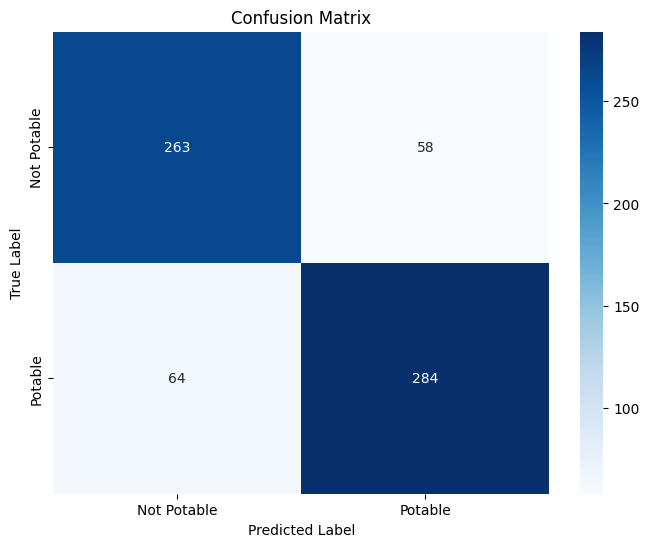

In [24]:
accuracy = accuracy_score(y_test_up, y_pred)
precision = precision_score(y_test_up, y_pred)
recall = recall_score(y_test_up, y_pred)
f1 = f1_score(y_test_up, y_pred)
y_pred_proba = best_model.predict_proba(X_test_up)[:, 1]
roc_auc = roc_auc_score(y_test_up, y_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

cm = confusion_matrix(y_test_up, y_pred)
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Not Potable', 'Potable'],
            yticklabels=['Not Potable', 'Potable'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

C:\Users\ishaa\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Epoch 1/50


C:\Users\ishaa\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:73: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5417 - loss: 249.9965 - val_accuracy: 0.6180 - val_loss: 20.7721
Epoch 2/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5079 - loss: 91.3482 - val_accuracy: 0.3820 - val_loss: 0.6957
Epoch 3/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4875 - loss: 36.3376 - val_accuracy: 0.3820 - val_loss: 0.6941
Epoch 4/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5102 - loss: 8.7094 - val_accuracy: 0.6180 - val_loss: 0.6911
Epoch 5/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6148 - loss: 6.6712 - val_accuracy: 0.6180 - val_loss: 0.6878
Epoch 6/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6127 - loss: 2.7964 - val_accuracy: 0.6180 - val_loss: 0.6841
Epoch 7/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6005 - loss: 2.5386 - val_accuracy: 0.6180 - val_loss: 0.6815
Epoch 8/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5948 - loss: 2.9786 - val_accuracy: 0.6180 - val_loss: 0.678

 99%|===================| 800/806 [00:11<00:00]       C:\Users\ishaa\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:950: UserWarning: The figure layout has changed to tight
  pl.tight_layout()
C:\Users\ishaa\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:624: UserWarning: The figure layout has changed to tight
  pl.tight_layout(pad=0, w_pad=0, h_pad=0.0)


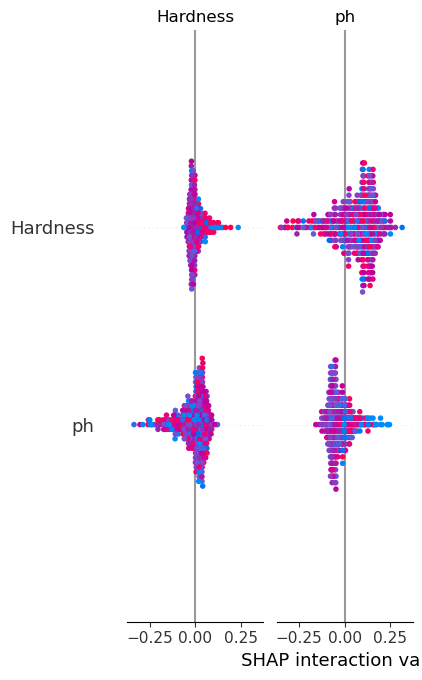

<Figure size 640x480 with 0 Axes>

In [1]:
import shap
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load dataset
data = pd.read_csv('water_potability.csv')
data = data.dropna()
X = data.drop(columns=['Potability'])
y = data['Potability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Machine Learning Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
ml_preds = rf_model.predict(X_test)

# Deep Learning Model
dl_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
dl_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
dl_model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1)
dl_preds = dl_model.predict(X_test)
dl_preds = (dl_preds > 0.5).astype(int).flatten()

# SHAP for Explainability
explainer = shap.Explainer(rf_model, X_train)
shap_values = explainer(X_test)
shap.summary_plot(shap_values.values, X_test)



# Save XAI Results
plt.savefig('shap_summary.png')


C:\Users\ishaa\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


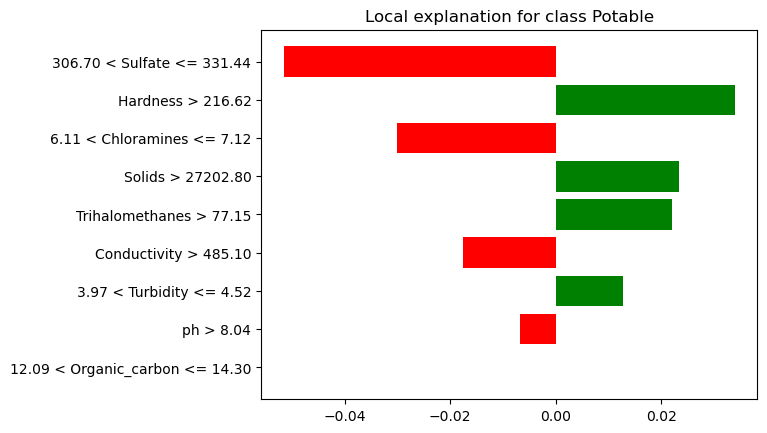

In [4]:
# LIME for Explainability
explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns,
    class_names=['Not Potable', 'Potable'],
    mode='classification'
)

# Choose an instance to explain
idx = 0  # Select the first test sample (can change)
instance = X_test.iloc[idx].values.reshape(1, -1)

# Generate explanation
exp = explainer_lime.explain_instance(instance[0], rf_model.predict_proba)

# Visualize explanation
exp.show_in_notebook()

# Save LIME explanation as an image
fig = exp.as_pyplot_figure()
fig.savefig("lime_explanation.png")

plt.show()
